In [5]:
import  zipfile

with zipfile.ZipFile("data/train.csv.zip", "r") as f:
    f.extractall("data/")

print("Extracted successfully!")

Extracted successfully!


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/train.csv")
df.shape

(404290, 6)

In [36]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [35]:
true_count = (df['qid1'] == 99).sum()
true_count

4

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
print(df['is_duplicate'].value_counts())

is_duplicate
0    255027
1    149263
Name: count, dtype: int64


In [8]:
df['is_duplicate'].count()

404290

In [9]:
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)

is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: ylabel='count'>

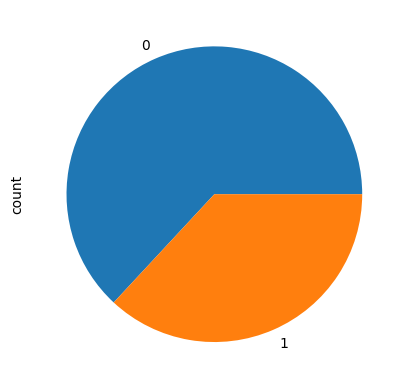

In [10]:
df['is_duplicate'].value_counts().plot(kind='pie')

In [18]:
df['qid2'].shape

(404290,)

In [58]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("No. of unique questions: ", np.unique(qid).shape[0])
x = qid.value_counts() > 1
# print("No. of questions getting repeated: ", x[x == True].shape[0])
print("No. of questions getting repeated: ", x.sum())


No. of unique questions:  537933
No. of questions getting repeated:  111780


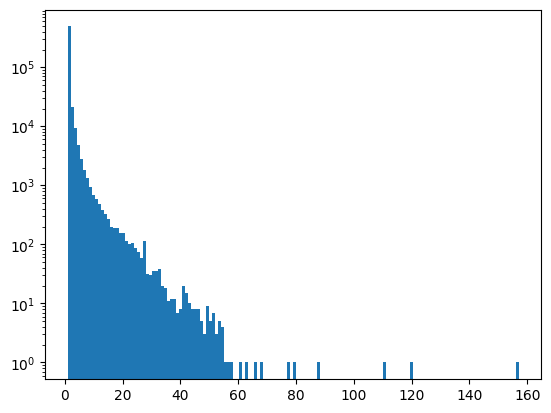

In [63]:
plt.hist(qid.value_counts().values, bins=150)
plt.yscale('log')
plt.show()


In [70]:
new_df = df.sample(30000)

In [71]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [72]:
new_df.duplicated().sum()

0

In [73]:
ques_df = new_df[['question1', 'question2']]
ques_df.head()

,question1,question2
216694,What are the pros and cons of being a dentist?,What are the advantages of being a dentist?
113017,How much gas does a car burn per hour while id...,How much do car designers make per year?
272726,What anti-semitic statements were made by Step...,Is BDS just anti-Semitism in disguise?
108750,Why does Thailand have so many transsexual women?,Who are some of the most beautiful transgender...
188437,How does the Nike employee store differ from a...,When will the Nike+ SportsWatch hit stores?


In [75]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
bow_matrix = cv.fit_transform(questions).toarray()
q1_arr, q2_arr = np.vsplit(bow_matrix, 2)

`bow_matrix` is of size (60000, 3000). *means 60000 questions and each question have 3000 features*. <br>
so, `np.vsplit(bow_matrix, 2)` will split the *bow_matrix* into 2 parts each consists of dimentions `(30000, 3000)`

how `bow_matrix` have *60000* questions? <br>
both column `question1 and quesion2` have *30000* questions each

`max_features = 3000` means we are limiting features to most used *3000* features to reduce size of vocab

In [79]:
bow_matrix.shape

(60000, 3000)

In [80]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df1

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
216694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


assign each sentence/question to its correspond index

In [81]:
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)

In [83]:
temp_df = pd.concat([temp_df1, temp_df2], axis=1)  # axis = 1 means concatination will happen column wise

In [84]:
temp_df.shape

(30000, 6000)

In [85]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
216694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [87]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
216694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
113017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(temp_df.iloc[:, 0:-1].values, temp_df.iloc[:, -1].values, test_size=0.2, random_state=True)

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [91]:
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7406666666666667

In [92]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [93]:
y_pred = xgb.predict(x_test)
accuracy_score(y_test, y_pred)

0.7296666666666667